<a href="https://colab.research.google.com/github/rajkonkret/PythonAnalizaDanych/blob/master/cwiczenia3_analiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zawiera m.in.:\
	•	całkowanie,\
	•	równania różniczkowe,\
	•	statystykę,\
	•	interpolację,\
	•	optymalizację,\
	•	przetwarzanie sygnału.*kursywa*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize, stats, spatial, fft, signal, linalg, ndimage, interpolate, cluster

Całkowanie i różniczkowanie

In [2]:
res, err = integrate.quad(lambda x: x**2, 0, 2)
print("Wynik całkowania ∫ x^2 dx", res, "Bład", err)

Wynik całkowania ∫ x^2 dx 2.666666666666667 Bład 2.960594732333751e-14


Optymalizacja

In [6]:
# Znajdowanie minimum funkcji kwadratowej: f(x) = (x-3)^2
res = optimize.minimize(lambda x: (x-3)**2, x0=0)
print('Minimum:', res)
print(res.x)

Minimum:   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.5388963550532293e-16
        x: [ 3.000e+00]
      nit: 2
      jac: [-1.697e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3
[2.99999998]


Statystyka

In [33]:
# Test Shapiro-Wilka
data = stats.norm.rvs(size=500)
stat, p = stats.shapiro(data)
print("Shapiro-Wilk", stat, "p-value", p) # p > 0.05 rozklad normalny

Shapiro-Wilk 0.9965668881114575 p-value 0.36462385618964177


Odległosci

In [34]:
# Odległość euklidesowa
from scipy.spatial.distance import euclidean
print("Odległość:", euclidean([1, 2], [4, 6]))

Odległość: 5.0


In [35]:
print(type(euclidean([1, 2], [4, 6])))

<class 'numpy.float64'>


Transformata Fouriera

In [37]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
yf = fft.fft(y)
print("FFT - pierwsze 5 wartości:", yf[:5])

FFT - pierwsze 5 wartości: [-1.66533454e-16 -0.j          1.56237833e+00-49.71568464j
 -4.25850363e-02 +0.67686977j -3.57787605e-02 +0.37849975j
 -3.38833476e-02 +0.26821431j]


Filtrowanie i przetwarzanie sygnałów

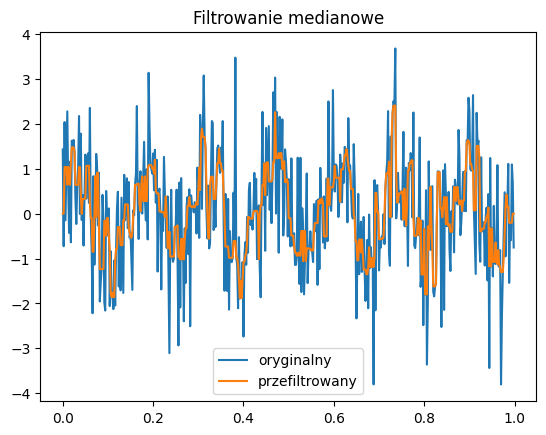

In [41]:
t = np.linspace(0, 1, 500, endpoint=False)
sig = np.sin(2 * np.pi * 7 * t) + np.random.normal(size=500)
filtered = signal.medfilt(sig, kernel_size=5)

plt.plot(t, sig, label="oryginalny")
plt.plot(t, filtered, label="przefiltrowany")
plt.legend()
plt.title("Filtrowanie medianowe")
plt.show()

Algebra liniowa\

A = \begin{bmatrix} 3 & 2 \\ 1 & 4 \end{bmatrix}\
b = \begin{bmatrix} 6 \\ 5 \end{bmatrix}\
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}\
A * x = b



In [43]:
A = np.array([[3,2], [1,4]])
b = np.array([6, 5])
x = linalg.solve(A, b)

print("Rozwiazanie układu równań:", x)

Rozwiazanie układu równań: [1.4 0.9]


Operacje na obrazach

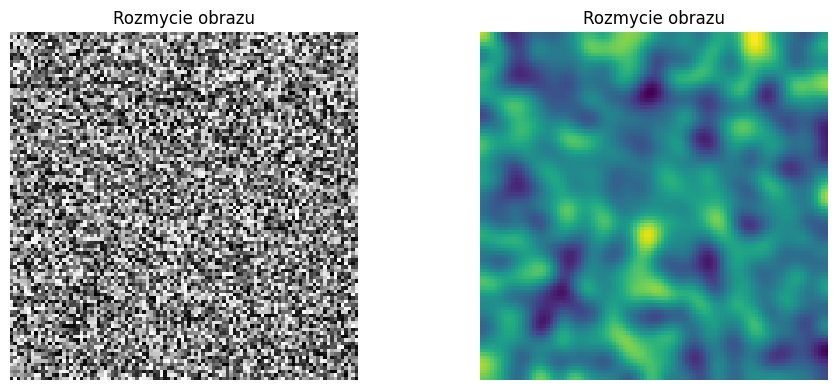

In [54]:
img = np.random.random((100, 100))
blurred = ndimage.gaussian_filter(img, sigma=3)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].imshow(img, cmap="grey")
axes[0].set_title("Rozmycie obrazu")
axes[0].axis('off')

axes[1].imshow(blurred, cmap="viridis")
axes[1].set_title("Rozmycie obrazu")
axes[1].axis('off')

plt.tight_layout()
plt.show()

Interpolacja

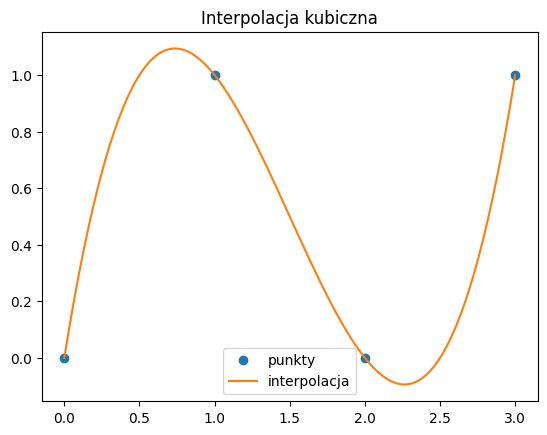

In [55]:
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 0, 1])
f = interpolate.interp1d(x, y, kind="cubic")
xnew = np.linspace(0, 3, 100)
plt.plot(x, y, 'o', label="punkty")
plt.plot(xnew, f(xnew), label='interpolacja')
plt.legend()
plt.title("Interpolacja kubiczna")
plt.show()

wykresy

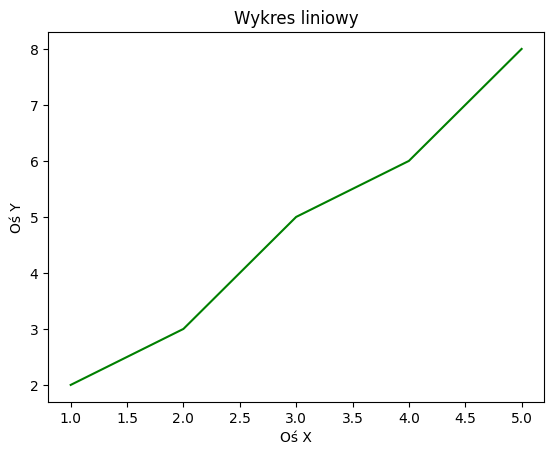

In [72]:
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 6, 8]

plt.plot(x, y, c="green")
plt.title("Wykres liniowy")
plt.xlabel("Oś X")
plt.ylabel("Oś Y")

plt.show()

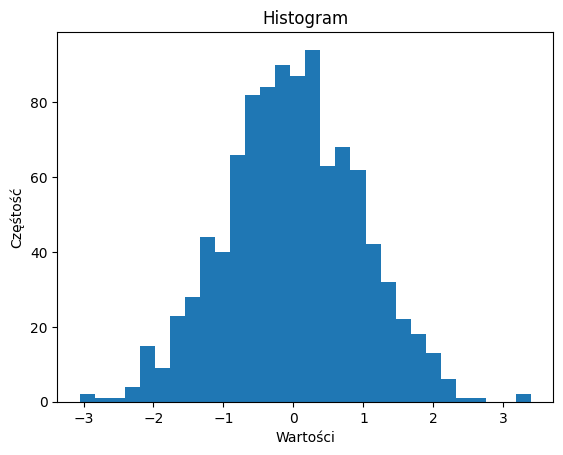

In [59]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.normal(0, 1, 1000)

plt.hist(data, bins=30)
plt.title("Histogram")
plt.xlabel("Wartości")
plt.ylabel("Częśtość")

plt.savefig('wykres.png')
plt.savefig('wykres.pdf')
plt.show()

In [65]:
!pip install mpld3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 3.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates._SwitchableDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:303: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.DateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:306: MatplotlibDeprecationWarning: The converter attribute was deprecated in Matplotlib 3.10 and will be removed in 3.12. Use get_converter and set_converter methods instead.
  isinstance(axis.converter, matplotlib.dates.ConciseDateConverter)
/usr/local/lib/python3.11/dist-packages/mpld3/mplexporter/utils.py:300: M

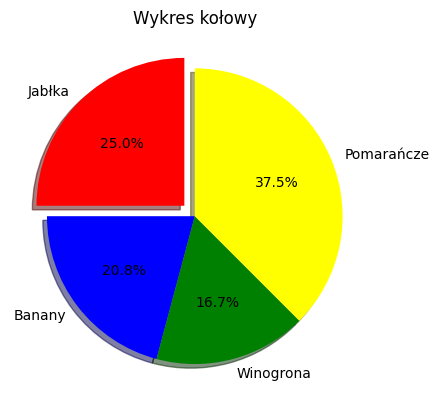

In [68]:
import mpld3

labels = ['Jabłka', "Banany", "Winogrona", "Pomarańcze"]
sizes = [30, 25, 20, 45]
colors = ['red', 'blue', 'green', 'yellow']

plt.pie(sizes, labels=labels, colors=colors,startangle=90,
        shadow=True, explode=(0.1, 0, 0, 0),autopct='%1.1f%%')

plt.title("Wykres kołowy")

html = mpld3.fig_to_html(plt.gcf())

plt.show()

with open('pie.html', 'w') as f:
    f.write(html)

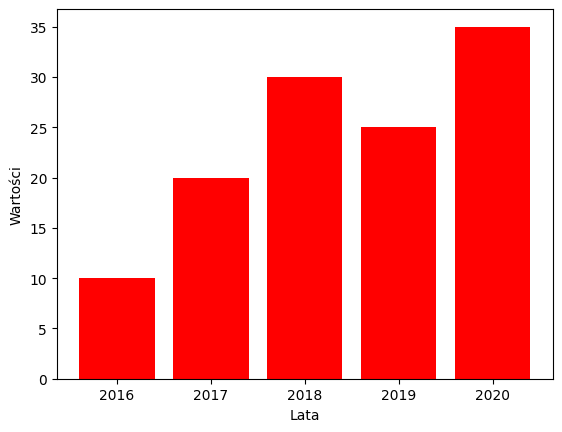

In [71]:
labels = ['2016','2017', '2018', '2019', '2020']
values = [10, 20, 30, 25, 35]

plt.bar(labels, values, color="red")

plt.xlabel("Lata")
plt.ylabel("Wartości")

plt.show()

In [73]:
print(np)

<module 'numpy' from '/usr/local/lib/python3.11/dist-packages/numpy/__init__.py'>


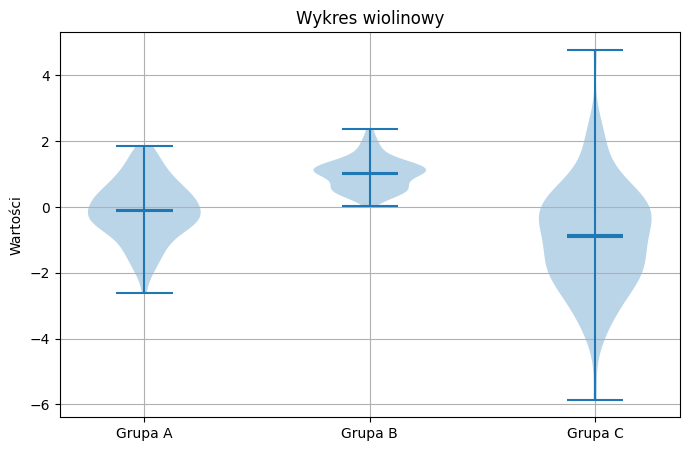

In [75]:
np.random.seed(42)
data = [
    np.random.normal(0, 1, 100),
    np.random.normal(1, 0.5, 100),
    np.random.normal(-1, 1.5, 100)
]

plt.figure(figsize=(8,5))
parts = plt.violinplot(data, showmeans=True, showmedians=True, showextrema=True)

plt.title("Wykres wiolinowy")
plt.xticks([1,2,3], ["Grupa A", "Grupa B", "Grupa C"])
plt.ylabel("Wartości")
plt.grid(True)
plt.show()

In [76]:
import seaborn as sns
tips = sns.load_dataset('tips')

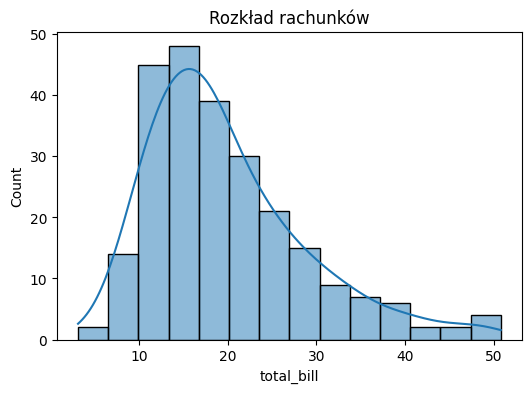

In [77]:
plt.figure(figsize=(6,4))
sns.histplot(data=tips, x="total_bill", kde=True)
plt.title("Rozkład rachunków")
plt.show()

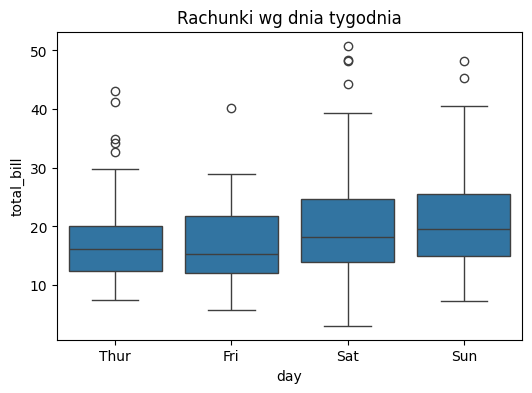

In [78]:
plt.figure(figsize=(6,4))
sns.boxplot(data=tips, x="day", y="total_bill")
plt.title("Rachunki wg dnia tygodnia")
plt.show()

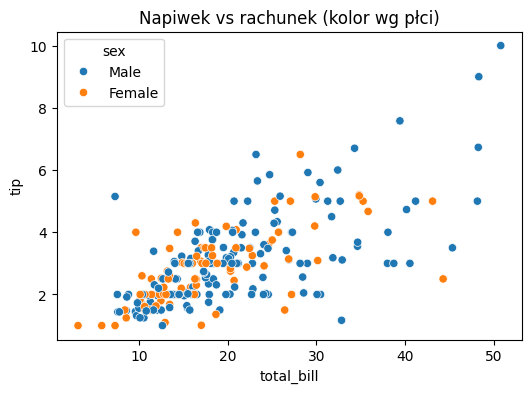

In [79]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex")
plt.title("Napiwek vs rachunek (kolor wg płci)")
plt.show()

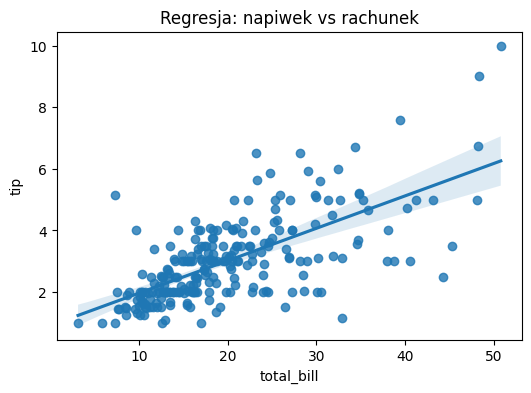

In [80]:
plt.figure(figsize=(6,4))
sns.regplot(data=tips, x="total_bill", y="tip", scatter=True)
plt.title("Regresja: napiwek vs rachunek")
plt.show()

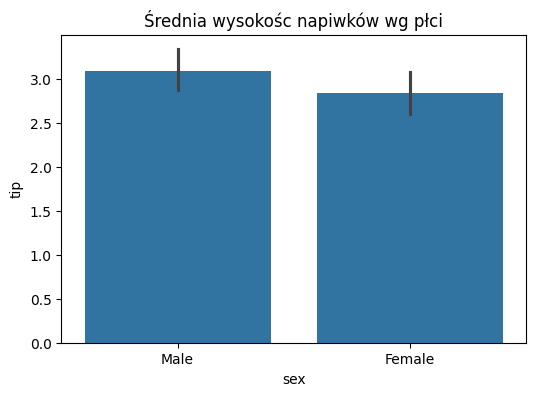

In [81]:
plt.figure(figsize=(6,4))
sns.barplot(data=tips,x="sex", y="tip", estimator="mean")
plt.title("Średnia wysokośc napiwków wg płci")
plt.show()

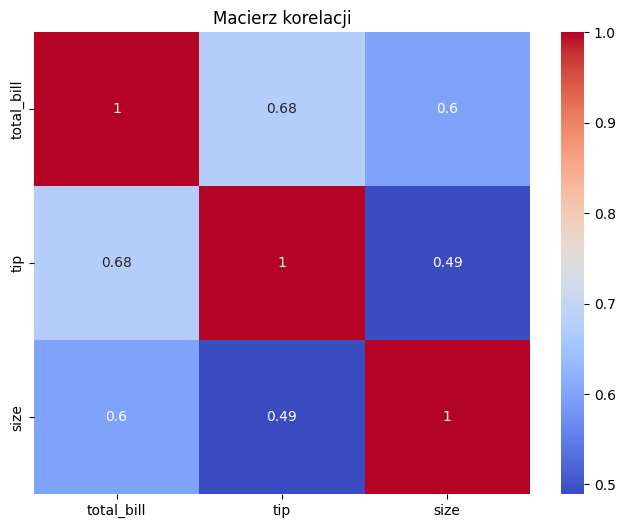

In [82]:
plt.figure(figsize=(8,6))
corr = tips.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Macierz korelacji")
plt.show()

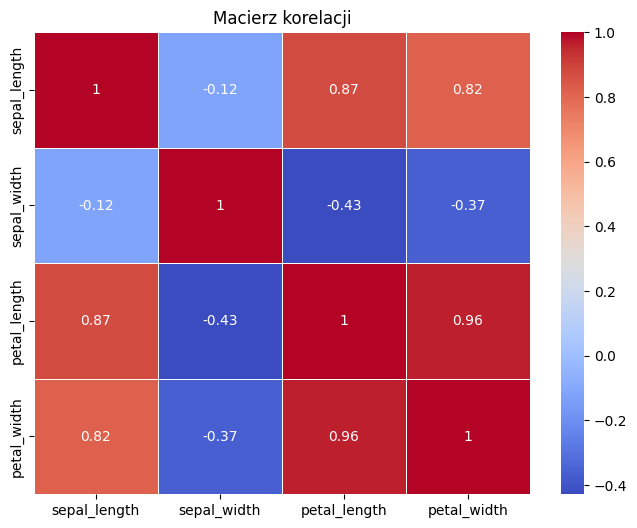

In [84]:
df = sns.load_dataset("iris")
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Macierz korelacji")
plt.show()

In [86]:
import plotly.graph_objects as go

z = np.random.rand(5, 5)

fig = go.Figure(data=go.Heatmap(z=z, colorscale="Viridis"))
fig.update_layout(title="Interaktywana mapa")
fig.show()